In [1]:
from numpy import cos
import matplotlib.pyplot as plt

# Q1: Damped and Forced Harmonic Oscillator:

Use RK4 to solve the damped and forced harmonic oscillator satisfying

$$2\ddot y + \gamma\dot y + 2y = 2\cos(\omega t),\quad\text{ where }y(0) = 2\text{ and }\dot y(0) = -1$$

for $\gamma = 0.2$ and $\omega = 1.2$.

In [2]:
# Importing the function
from library.diffeq import c_ode_2

## Damped Harmonic Oscilation
Let $\dot y = z$ (or $\frac{dy}{dt} = z$).

Then the given equation reduces to:
$$\ddot y = \dot z = \frac{dz}{dt} = - y - \frac{1}{2}\gamma z$$

In [14]:
gamma = 0.2
omega = 1.2
def f1(t, y, z): return z
def f2(t, y, z): return -y-(gamma*z)/2
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

ts, ys, zs = c_ode_2(f1, f2, 60, t_0, y_0, z_0, h)

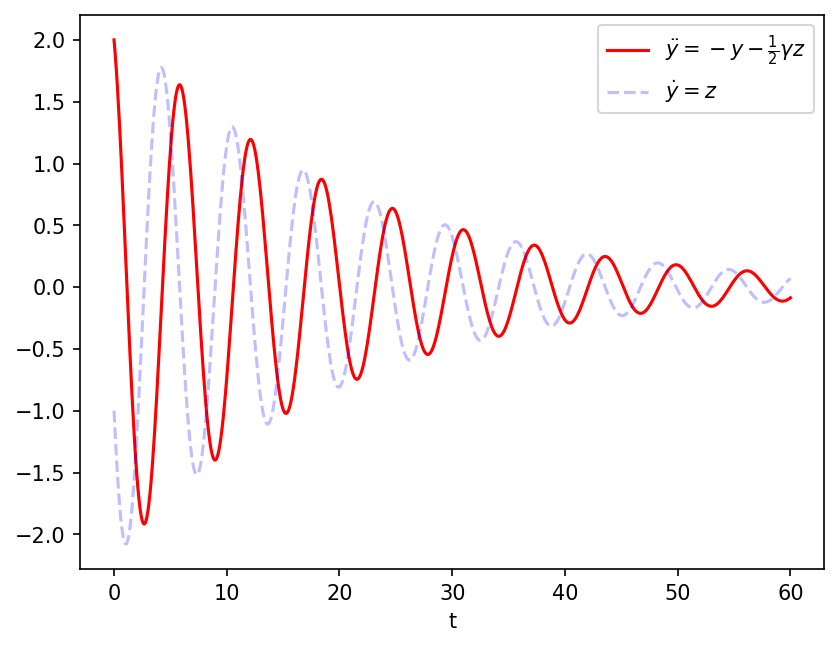

In [16]:
plt.figure(dpi=150)
plt.plot(ts, ys, "r", label=r"$\ddot y = - y - \frac{1}{2}\gamma z$")
plt.plot(ts, zs, "b--", label=r"$\dot y = z$", alpha=0.25)
plt.xlabel("t")
plt.legend()

## Forced Harmonic Oscillation
Let $\dot y = z$ (or $\frac{dy}{dt} = z$).

Then the given equation reduces to:
$$\ddot y = \dot z = \frac{dz}{dt} = \cos(\omega t) - y - \frac{1}{2}\gamma z$$

In [5]:
gamma = 0.2
omega = 1.2
def f1(t, y, z): return z
def f2(t, y, z): return cos(omega*t)-y-(gamma*z)/2
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

ts, ys, zs = c_ode_2(f1, f2, 40, t_0, y_0, z_0, h)

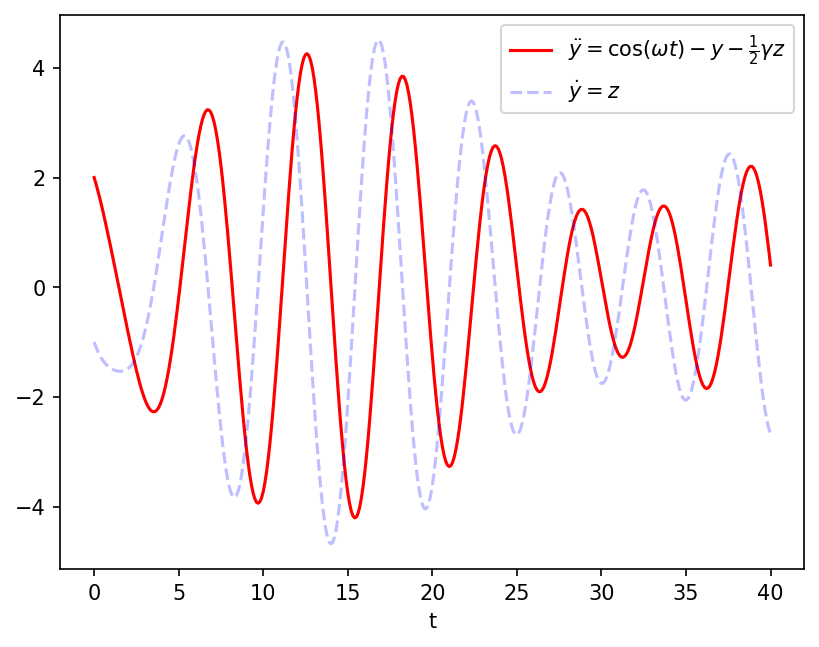

In [6]:
plt.figure(dpi=150)
plt.plot(ts, ys, "r", label=r"$\ddot y = \cos(\omega t) - y - \frac{1}{2}\gamma z$")
plt.plot(ts, zs, "b--", label=r"$\dot y = z$", alpha=0.25)
plt.xlabel("t")
plt.legend()

# Q2. Solution to Heat Equation:
Equation for heat conduction in a thin, un-insulated rod of length $L = 10 m$ is
$$ \frac{d^2 T}{d x^2}+\alpha\left(T_a-T\right)=0 $$
where the heat transfer coefficient $α = 0.01\ m^{−2}$ parameterizes heat dissipated to the surrounding air and $T_{a} = 20^{\circ}$ C is the ambient temperature. If $T(x = 0) = 40^{\circ}$ C and $T(x = L) = 200^{\circ}$ C, solve the boundary value problem using Shooting Method with RK4 integrator and determine at what $x$ the temperature is $T = 100^{\circ}$ C.

In [41]:
from library.diffeq import my_shooting_method
from library.interpolation import interpolate
from library.matrix import truncate_p

The temperature is 100C at x = 4.332


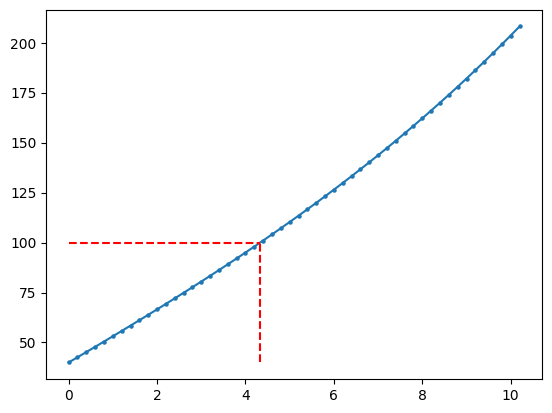

In [42]:
def f1(x, T, z):
    return z

def f2(x, T, z):
    return 0.01*(T - 20)

xi = 0
Ti = 40
xf = 10
Tf = 200
h = 0.2
tol = 1e-3

x, T, Z = my_shooting_method(f1, f2, 10, 100, xi, Ti, xf, Tf, h, tol)
T100 = interpolate(100, T, x)
print("The temperature is 100C at x =", truncate_p(T100,3,str))
plt.scatter(x, T, s = 5)
plt.plot(x, T)
plt.plot([0, T100], [100, 100], "r--")
plt.plot([T100, T100], [40, 100], "r--")

# Q4: Dominant Eigen Value and Eigen Vector of the matrix:

$$
\begin{pmatrix}
2 & 1 & 2 \\
2 & 2 & -2 \\
3 & 1 & 1
\end{pmatrix}
$$

In [10]:
from library.matrix import Matrix
from library.eigen import get_eigen

In [11]:
A = Matrix(
    [
        [2, 1, 2],
        [2, 2, -2],
        [3, 1, 1]
    ], name="A"
)

val, vec, i = get_eigen(A, epsilon=1e-3, seed=0.6)
print(f"Number of iterations: {i}")
print(f"Eigenvalue: {val}")
print(vec)

Number of iterations: 8
Eigenvalue: 4.000
e-vector = |0.707|
           |0.000|
           |0.707|

